In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:

n = 2048  # object size in each dimension
pad = n//4
npos= 16

detector_pixelsize = 3.03751e-6
energy = 33.35  # [keV] xray energy
wavelength = 1.2398419840550367e-09/energy  # [m] wave length
focusToDetectorDistance = 1.28  # [m]
sx0 = 1.286e-3
z1 = np.tile(5.5*1e-3-sx0, [npos]) # 5.5
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1
voxelsize = np.abs(detector_pixelsize/magnifications[0]*2048/n)  # object voxel size


In [5]:
path = f'/data/vnikitin/ESRF/ID16A/20240924/SiemensLH/SiemensLH_003p3nm_1000ms_01/'
with h5py.File(f'{path}SiemensLH_003p3nm_1000ms_010000.h5','r') as fid:
    spz = np.array(str(np.array(str(np.array(fid['/entry_0000/instrument/PCIe/header/spz']))[1:]))[1:-1].split(' '),dtype='float32')*1e-6/voxelsize
    spy = np.array(str(np.array(str(np.array(fid['/entry_0000/instrument/PCIe/header/spy']))[1:]))[1:-1].split(' '),dtype='float32')*1e-6/voxelsize

shifts0 = np.zeros([1,16,2],dtype='float32')
shifts0[:,:,1] = spy
shifts0[:,:,0] = -spz

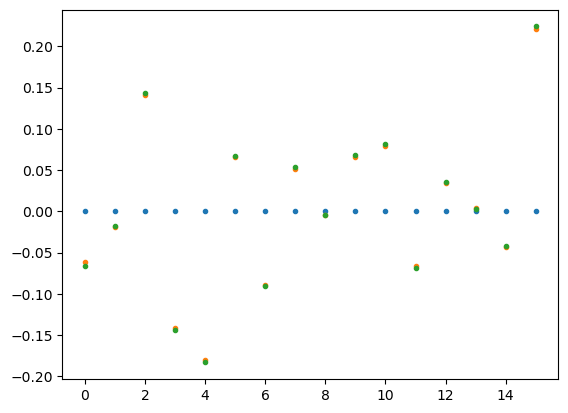

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


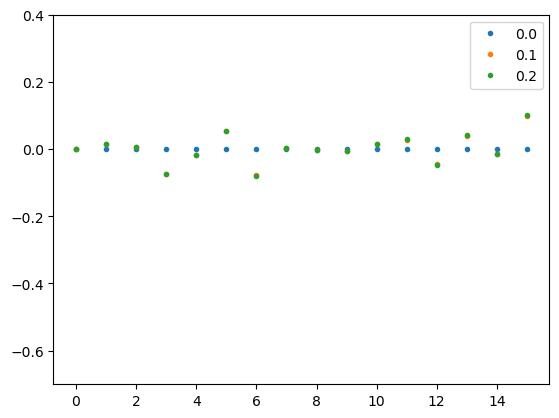

In [7]:
shifts={}
iter=32*12
for k in [0.0,0.1]:
    shifts[f'{k}']= np.load(f'/data/vnikitin/ESRF/ID16A/20240924_rec/SiemensLH/SiemensLH_003p3nm_1000ms_01/crec_shift2048_{k}_5.5_{iter:03}.npy')
    plt.plot(shifts[f'{k}'][0,:,0]-shifts0[0,:,0],'.',label=f'{k}')
    # plt.plot(shifts[f'{k}'][0,:,1]-shifts0[0,:,1],'.')
plt.show()
plt.ylim([-0.7,0.4])
plt.legend()
shifts={}
for k in [0.0,0.1]:
    shifts[f'{k}']= np.load(f'/data/vnikitin/ESRF/ID16A/20240924_rec/SiemensLH/SiemensLH_003p3nm_1000ms_01/crec_shift2048_{k}_5.5_{iter:03}.npy')
    plt.plot(shifts[f'{k}'][0,:,1]-shifts0[0,:,1],'.',label=f'{k}')
    # plt.plot(shifts[f'{k}'][0,:,1]-shifts0[0,:,1],'.')
    # plt.show()
plt.ylim([-0.7,0.4])
plt.legend()
    